In [1]:
import numpy as np
import pandas as pd
import re #library for working with regular expressions
import nltk #a cornerstone for NLP tasks in Python. It offers tools for tokenization, stemming, stop word removal, and much more.
nltk.download('punkt') # Download necessary data for punkt tokenizer if you haven't already
nltk.download('stopwords') #Downloads a list of common words (like "the," "a," "is") called stop word
from nltk.corpus import stopwords #Imports the stopwords module to access and utilize the downloaded list of stop words.
nltk.download('popular') # Download popular package which includes the Porter Stemmer

# Instead of importing directly from 'nltk.stem.porter', import from 'nltk.stem'
from nltk.stem import PorterStemmer # Changed to PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer #sed to convert text into numerical representations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzippin

In [2]:
print(stopwords.words('english')) #Remove all these words during stemming process

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data - Preprocessing

In [3]:
#load dataset in pandas data frame
news_dataset = pd.read_csv('WELFake_Dataset.csv')

In [4]:
news_dataset = news_dataset.head(10000)


In [5]:
news_dataset.shape

(10000, 4)

In [6]:
news_dataset = news_dataset.rename(columns={'Unnamed: 0': 'id'})

In [7]:
news_dataset.head()

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [8]:
news_dataset.isnull().sum() #count of how many missing values are present in each column of your dataset.

,0
id,0
title,65
text,8
label,0


In [9]:
# will use Imputation as a lot of values are missing, but won't do it here, have enough to train our dataset

In [10]:
# Will replace the value with null string: means  'empty string'

In [11]:
news_dataset = news_dataset.fillna('') #'' : means null string, replace missing values by null string

In [12]:
#Merging title and text:
news_dataset['content'] = news_dataset['title']+' '+news_dataset['text']

In [13]:
news_dataset.head()

,id,title,text,label,content
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


In [14]:
#separating the data and label:

#getting it ready for training set

X = news_dataset.drop('label', axis=1)
Y = news_dataset['label']

In [15]:
# print(X)
# print(Y)

Stemming:

The process of reducing word to its ROOT WORD

example:

acter, actress, acting -> act

In [16]:
 port_stem = PorterStemmer()

In [17]:
#creating a f(x) becoz we need to replicate a code snippet.
def stemming(content):
  stemmed_content = re.sub('[^a-zA-z]',' ',content) #1
  stemmed_content = stemmed_content.lower() #2
  stemmed_content = stemmed_content.split() #3
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #4
  stemmed_content = ' '.join(stemmed_content) #5
  return stemmed_content

# What we did:
# - made f(x) as stemming and input as content
#1 :To replace any character that is not a letter (a-z, A-Z) with a space. This essentially cleans the text by removing punctuation and numbers, leaving only words.
#2 :This line converts all the text in stemmed_content to lowercase. This is done to ensure that words are treated the same regardless of their capitalization.
#3 :This line uses the split() method to break the text in stemmed_content into individual words. These words are stored as a list in stemmed_content.

#4 :-if not word in stopwords.words('english'): This condition checks if the word is not a common English "stop word" (like "the," "a," "is") . Stop words are often removed in NLP as they don't usually contribute much to the meaning of the text.
#   -port_stem.stem(word): If the word is not a stop word, it is stemmed using the port_stem object (which is likely an instance of a Porter Stemmer from the NLTK library). Stemming reduces the word to its root form.

#5 :Finally, this line joins the stemmed words back into a single string with spaces in between, effectively reconstructing the stemmed text.

In [18]:
#Now need to apply upper function to our content column

news_dataset['content'] = news_dataset['content'].apply(stemming)
'''
Take each text entry in the content column.
Pass it to the stemming function.
Store the result (the stemmed version of the text) back into the content column, updating the text in the dataset.
'''


'\nTake each text entry in the content column.\nPass it to the stemming function.\nStore the result (the stemmed version of the text) back into the content column, updating the text in the dataset.\n'

In [19]:
 print(news_dataset['content'])

0       law enforc high alert follow threat cop white ...
1                               post vote hillari alreadi
2       unbeliev obama attorney gener say charlott rio...
3       bobbi jindal rais hindu use stori christian co...
4       satan russia unv imag terrifi new supernuk wes...
                              ...                        
9995    yemen saleh readi turn new page saudi led atta...
9996    anonym hacker fight justina pelleti plead guil...
9997    hot air balloon crash texa kill offici say new...
9998    palm goe ken loach film cann new york time can...
9999    mike penc debat throw donald trump bu republic...
Name: content, Length: 10000, dtype: object


##The Main dataset which we need:

In [20]:
X = news_dataset['content'].values
Y = news_dataset['label']
# Y.value_counts()

In [21]:
# print(X)
# print(Y)

In [22]:
#Converting the textual data to numerical data

vectorizer = TfidfVectorizer() #Tf:term frequency,counts no. of times a word appears in a document/paragrah
                             #id:inverse document,finds repeated words as those words don't have such importance and reduces its importance value
                             #So by all this we create feature vector

# Reset X to the original content
X = news_dataset['content'].values # Convert Series to numpy array, did again becoz it was showing else then
vectorizer.fit(X)
X = vectorizer.transform(X)
# print(X)

If we feed this textual data to ML model, it cannot understand all these strings,

!But if we feed this transform text to our ML model then it can understand and do predictions

In [23]:
#Splitting dataset in train and test
X_train,X_test,y_train,y_test = train_test_split(X,Y, stratify=Y, test_size=0.25, random_state=42)

In [26]:
modelL = LogisticRegression()
modelR = RandomForestRegressor(n_estimators=50, random_state=42)
modelS = SVC()
modelD = DecisionTreeRegressor()

In [27]:
modelL.fit(X_train, y_train)
modelR.fit(X_train, y_train)
modelS.fit(X_train, y_train)
modelD.fit(X_train, y_train)


DecisionTreeRegressor()

Evaluation on logistic Regression

In [28]:
X_train_predictionL =  modelL.predict(X_train)
acc_trainL = accuracy_score(X_train_predictionL, y_train)
X_test_predictionL =  modelL.predict(X_test)
acc_testL = accuracy_score(X_test_predictionL, y_test)

print("Accuracy score on training data:",acc_trainL)
print("Accuracy score on testing data:",acc_testL)

Accuracy score on training data: 0.9512
Accuracy score on testing data: 0.918


Evaluation on Decision Trees

In [29]:
X_train_predictionD =  modelD.predict(X_train)
acc_trainD = accuracy_score(X_train_predictionD, y_train)
X_test_predictionD =  modelD.predict(X_test)
acc_testD = accuracy_score(X_test_predictionD, y_test)

print("Accuracy score on training data:",acc_trainD)
print("Accuracy score on testing data:",acc_testD)

Accuracy score on training data: 1.0
Accuracy score on testing data: 0.9016


Evaluation on SVM

In [30]:
X_train_predictionS =  modelS.predict(X_train)
acc_trainS = accuracy_score(X_train_predictionS, y_train)
X_test_predictionS =  modelS.predict(X_test)
acc_testS = accuracy_score(X_test_predictionS, y_test)

print("Accuracy score on training data:",acc_trainS)
print("Accuracy score on testing data:",acc_testS)

Accuracy score on training data: 0.9945333333333334
Accuracy score on testing data: 0.9284


Evaluation on Random Forest

In [31]:
X_train_predictionR = modelR.predict(X_train)

# Round predictions to the nearest integer (0 or 1)
X_train_predictionR = np.round(X_train_predictionR)
acc_trainR = accuracy_score(X_train_predictionR, y_train)

X_test_predictionR = modelR.predict(X_test)

# Round predictions to the nearest integer (0 or 1)
X_test_predictionR = np.round(X_test_predictionR)
acc_testR = accuracy_score(X_test_predictionR, y_test)

print("Accuracy score on training data:",acc_trainR)
print("Accuracy score on testing data:",acc_testR)

Accuracy score on training data: 0.9998666666666667
Accuracy score on testing data: 0.9324


##Making a Predictive System:

In [32]:
X_test.shape
# (2500, 59353)
# no. of rows, no. of columns becoz of tfid words got splitted into new colums so it increased a lot

(2500, 59353)

In [33]:
n=2022
X_new = X_test[n] #means the first row/news

prediction_final = modelD.predict(X_new)
# prediction_final = int(np.round(prediction_final[0])) #becoz we're using Random Forest else comment out.

if prediction_final[0] == 0:
# if prediction_final == 1: #becoz we're using Random Forest else comment out., use above one for others
  print('The news is Real')
else:
  print('The news is Fake')

check = y_test.iloc[n]  #!!best practice to use iloc
# print(check)

if check==prediction_final[0]:
  print("Correct Prediction")
else:
  print("Wrong Prediction")

The news is Real
Correct Prediction


##Model Performance Comparision

In [34]:
import matplotlib.pyplot as plt


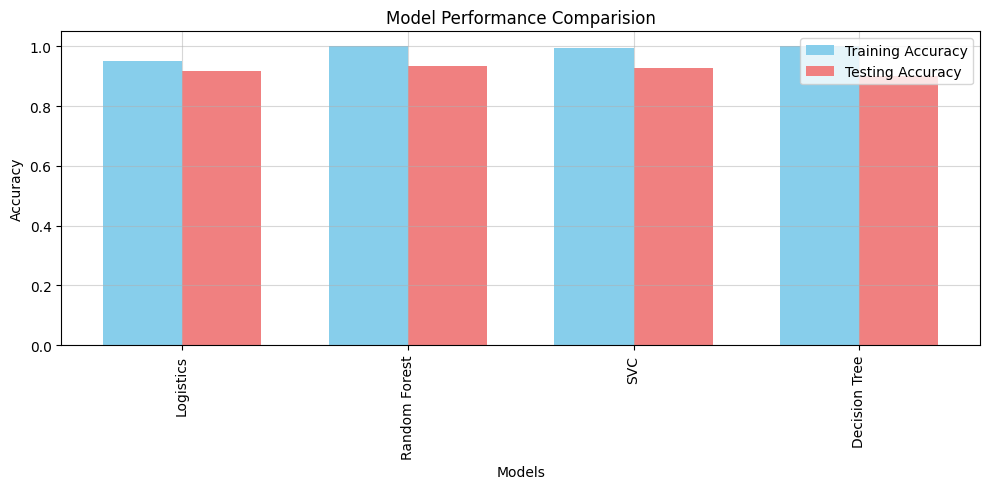

In [35]:
plt.figure(figsize=(10,5))

models = ['Logistics', 'Random Forest', 'SVC', 'Decision Tree']
train_accuracies = [acc_trainL, acc_trainR, acc_trainS, acc_trainD]
test_accuracies = [acc_testL, acc_testR, acc_testS, acc_testD]

x = np.arange(len(models))
width = 0.35

plt.bar(x-width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
plt.bar(x+width/2, test_accuracies, width, label='Testing Accuracy', color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Accuracy', rotation=90)
plt.title('Model Performance Comparision')
plt.xticks(x,models,rotation=90)
plt.legend()
plt.grid(True,alpha=0.5)
plt.tight_layout()
plt.show()